In [1]:
from google.colab import files
files.upload()  # Se abrirá un diálogo para que subas el archivo kaggle.json


Saving kaggle (6).json to kaggle (6).json


{'kaggle (6).json': b'{"username":"eddyarias","key":"da0e8449e6b92da62bc40f739b628e12"}'}

In [2]:
!mkdir -p ~/.kaggle  # Crea el directorio ~/.kaggle si no existe
!mv /content/kaggle\ \(6\).json ~/.kaggle/kaggle.json  # Mueve el archivo y lo renombra a kaggle.json


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!ls -l ~/.kaggle/

total 4
-rw------- 1 root root 65 Sep 25 04:51 kaggle.json


In [5]:
!pip install kaggle

Dataset: paultimothymooney/chest-xray-pneumonia

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [02:14<00:00, 18.2MB/s]
100% 2.29G/2.29G [02:14<00:00, 18.3MB/s]


In [7]:
!unzip chest-xray-pneumonia.zip -d ./dataset-folder

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: ./dataset-folder/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: ./datas

In [8]:
import os

# Ruta donde descomprimiste el dataset
dataset_path = './dataset-folder'  # Reemplaza esto con la ruta correcta

# Inicializar un diccionario para almacenar la información
estructura_directorios = {}

# Función para contar archivos y organizar la estructura
def contar_archivos_y_estructura(path):
    for root, dirs, files in os.walk(path):
        # Inicializar contadores
        conteo_imagenes = 0
        conteo_otros = 0
        tipos_archivos = set()

        for file in files:
            # Contar imágenes
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                conteo_imagenes += 1
            else:
                conteo_otros += 1
                # Añadir tipo de archivo
                tipo_archivo = file.split('.')[-1]  # Obtener extensión
                tipos_archivos.add(tipo_archivo)

        # Almacenar la información en el diccionario
        estructura_directorios[root] = {
            'cantidad_imagenes': conteo_imagenes,
            'cantidad_otros': conteo_otros,
            'tipos_archivos': list(tipos_archivos)
        }

# Contar archivos y obtener la estructura
contar_archivos_y_estructura(dataset_path)

# Imprimir la estructura en forma de árbol
def imprimir_estructura(directorio_dict):
    for directorio, info in directorio_dict.items():
        print(f"Directorio: {directorio}")
        print(f"  Cantidad de imágenes: {info['cantidad_imagenes']}")
        print(f"  Cantidad de otros archivos: {info['cantidad_otros']}")
        print(f"  Tipos de archivos: {', '.join(info['tipos_archivos'])}")

# Imprimir la estructura
imprimir_estructura(estructura_directorios)



Directorio: ./dataset-folder
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/chest_xray
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 1
  Tipos de archivos: DS_Store
Directorio: ./dataset-folder/chest_xray/chest_xray/test
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 1
  Tipos de archivos: DS_Store
Directorio: ./dataset-folder/chest_xray/chest_xray/test/NORMAL
  Cantidad de imágenes: 234
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/chest_xray/test/PNEUMONIA
  Cantidad de imágenes: 390
  Cantidad de otros archivos: 0
  Tipos de archivos: 
Directorio: ./dataset-folder/chest_xray/chest_xray/val
  Cantidad de imágenes: 0
  Cantidad de otros archivos: 1
  Tipos de archivos: DS_Store
Directorio: ./dataset-folder/chest_xray/chest_xray/v

### Análisis General

*   **Cantidad Total de Imágenes**:
    *   **Total de Imágenes en `train`**: 1341 (NORMAL) + 3875 (PNEUMONIA) = **5216 imágenes**
    *   **Total de Imágenes en `val`**: 8 (NORMAL) + 8 (PNEUMONIA) = **16 imágenes**
    *   **Total de Imágenes en `test`**: 234 (NORMAL) + 390 (PNEUMONIA) = **624 imágenes**

*   **Clasificación de las Imágenes**:
    *   Las imágenes están clasificadas en dos categorías: **NORMAL** y **PNEUMONIA**, tanto en los conjuntos de entrenamiento como en los de prueba y validación. Esto sugiere que el dataset está diseñado para tareas de clasificación, posiblemente para un modelo de aprendizaje automático que clasifica radiografías de tórax.


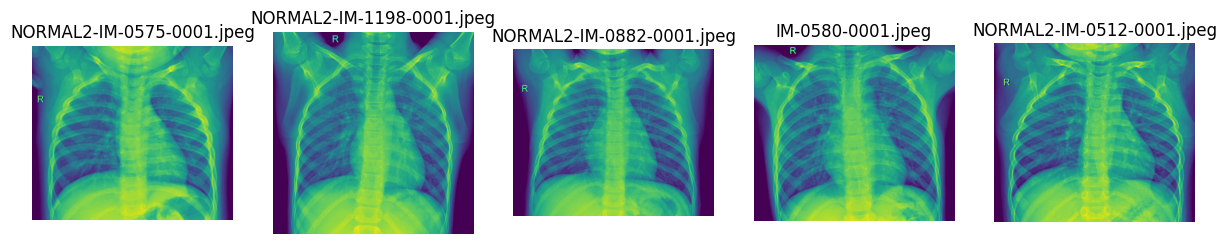

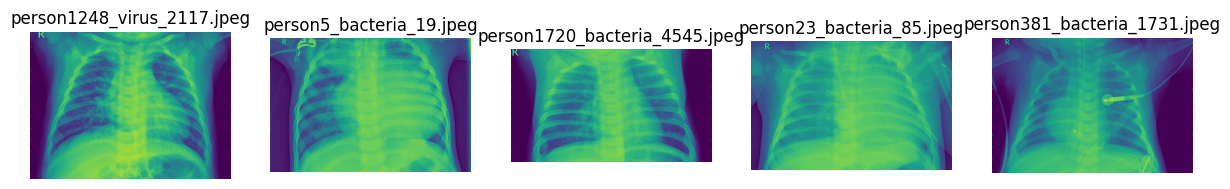

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Función para mostrar imágenes
def mostrar_imagenes(directorio, num_imagenes=5):
    imagenes = [f for f in os.listdir(directorio) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    plt.figure(figsize=(15, 5))
    for i in range(min(num_imagenes, len(imagenes))):
        img_path = os.path.join(directorio, imagenes[i])
        img = Image.open(img_path)
        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(imagenes[i])
    plt.show()

# Mostrar algunas imágenes de cada clase en el conjunto de entrenamiento
mostrar_imagenes('./dataset-folder/chest_xray/chest_xray/train/NORMAL')
mostrar_imagenes('./dataset-folder/chest_xray/chest_xray/train/PNEUMONIA')


# Crear un cnn

In [ ]:
!pip install torch torchvision matplotlib


In [ ]:
# Importar las bibliotecas necesarias
import os
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progreso

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

## Preparar los Datos
Usaremos torchvision para cargar los datos y realizar las transformaciones necesarias, como la normalización y el aumento de datos.

In [ ]:

# Definir las transformaciones con data augmentation para el conjunto de entrenamiento
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Reflejo horizontal
    transforms.RandomRotation(10),      # Rotación aleatoria
    transforms.RandomResizedCrop(224), # Recorte y redimensionamiento aleatorio
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Ajustes de color
    transforms.ToTensor(),              # Convertir a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalización
])

# Definir las transformaciones para validación y prueba (sin data augmentation)
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),     # Redimensionar a 224x224
    transforms.ToTensor(),               # Convertir a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalización
])

# Cargar los datasets con las transformaciones aplicadas
train_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/train', transform=train_transform)
val_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/val', transform=val_test_transform)
test_dataset = datasets.ImageFolder(root='./dataset-folder/chest_xray/chest_xray/test', transform=val_test_transform)

# Definir el tamaño del batch
batch_size = 32

# Crear DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## Definir la Red Neuronal Convolucional

In [ ]:
# Definir una arquitectura de CNN más robusta
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Primera capa convolucional
        self.bn1 = nn.BatchNorm2d(32)  # Normalización por lotes
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Segunda capa convolucional
        self.bn2 = nn.BatchNorm2d(64)  # Normalización por lotes
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # Tercera capa convolucional
        self.bn3 = nn.BatchNorm2d(128)  # Normalización por lotes
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Max Pooling
        self.dropout = nn.Dropout(p=0.5)  # Dropout
        self.fc1 = nn.Linear(128 * 28 * 28, 256)  # Capa completamente conectada
        self.bn_fc1 = nn.BatchNorm1d(256)  # Normalización por lotes
        self.fc2 = nn.Linear(256, 2)  # Capa de salida (para 2 clases)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Aplicar convolución + ReLU + Pooling
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Segunda capa
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Tercera capa
        x = x.view(-1, 128 * 28 * 28)  # Aplanar las características
        x = self.dropout(nn.ReLU()(self.bn_fc1(self.fc1(x))))  # Capa completamente conectada con Dropout
        x = self.fc2(x)  # Capa de salida
        return x

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


In [ ]:
# Crear una instancia del modelo y moverlo al dispositivo
model = EnhancedCNN().to(device)




##Configurar la Pérdida y el Optimizador

In [ ]:
# Configurar la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



## Entrenamiento del Modelo

In [ ]:
import torch

torch.cuda.empty_cache()


In [ ]:

# Inicializar Early Stopping
early_stopping = EarlyStopping(patience=5, verbose=True)

# Definir número de épocas
num_epochs = 8  # Puedes ajustar el número de épocas

# Listas para almacenar las métricas
train_losses = []
val_accuracies = []

# Entrenamiento
for epoch in range(num_epochs):
    model.train()  # Modo de entrenamiento
    running_loss = 0.0
    pbar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch')  # Barra de progreso

    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)  # Mover a GPU
        optimizer.zero_grad()  # Inicializar los gradientes
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calcular la pérdida
        loss.backward()  # Backward pass
        optimizer.step()  # Actualizar los pesos

        running_loss += loss.item()
        pbar.set_postfix(loss=loss.item())  # Mostrar pérdida actual

    # Calcular pérdida promedio
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluación en el conjunto de validación
    model.eval()  # Modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():  # Sin cálculo de gradientes
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Mover a GPU
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')

    # Llamar a Early Stopping
    early_stopping(accuracy)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

## Evaluación del Modelo

In [ ]:
# Graficar las métricas
plt.figure(figsize=(12, 5))

# Graficar pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o')
plt.title('Precisión en el Conjunto de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')

plt.tight_layout()
plt.show()
